# Exploratory Data Analysis

EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level, the EDA can be performed in two folds i.e., univariate analysis and multivariate analysis.
Let's learn to consider an example data set to learn practically. 


### Iris Data

Iris dataset is one of a well-known dataset used extensively in pattern recognition literature. It is hosted at the UC Irvine Machine Learning Repository. The data set contains petal length, petal width, sepal length and sepal width measurement for 3 types of Iris flowers i.e., Setosa, Versicolor, and Virginica.

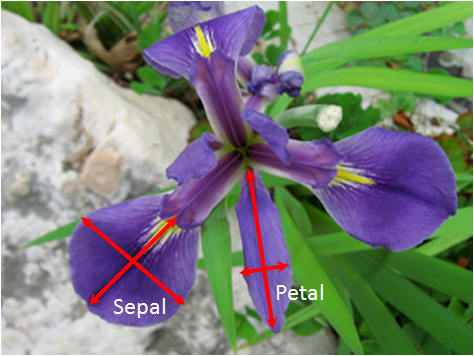

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/Iris_Flower.png', width=500)

### Load Data

The Iris dataset comes as part of the scikit-learn dataset package which contains some of the populare datasets of machine learning literature.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

### Exploratory Data Analysis

EDA is all about understanding your data by employing summarizing and visualizing techniques.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')

# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))

# data dimension 
print(iris.shape)

# Peek at the 1st few records
iris.head()

(150, 5)


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Univariate Analysis

Individual variables are analyzed in isolation to get a better understanding of them. 

Pandas provide describe function to create summary statistics in tabular format for all variables. These statistics are very useful for the numerical type of variables to understand any quality issues such as missing value and presence of outliers.

In [4]:
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The columns 'species' is categorical, so lets check the frequency distribution for each category.

In [5]:
print(iris['species'].value_counts())

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


Pandas supports plotting functions to quick visualization on attributes. We can see from the plot that 'species' has 3 category with 50 records each.

<Figure size 1080x576 with 0 Axes>

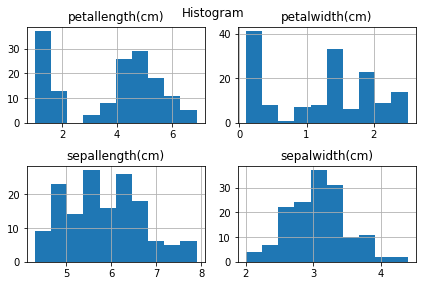

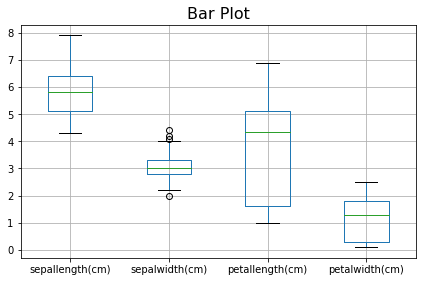

In [6]:
# Set the size of the plot
plt.figure(figsize=(15,8))

iris.hist()        # plot histogram
plt.suptitle("Histogram", fontsize=12) # use suptitle to add title to all sublots
plt.tight_layout(pad=1)
plt.show()

iris.boxplot()     # plot boxplot  
plt.title("Bar Plot", fontsize=16)
plt.tight_layout(pad=1)
plt.show()

### Multivariate Analysis

In multivariate analysis you try to estabilish a sense of relationship of all variables with one other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4B428E588>,
      dtype=object)

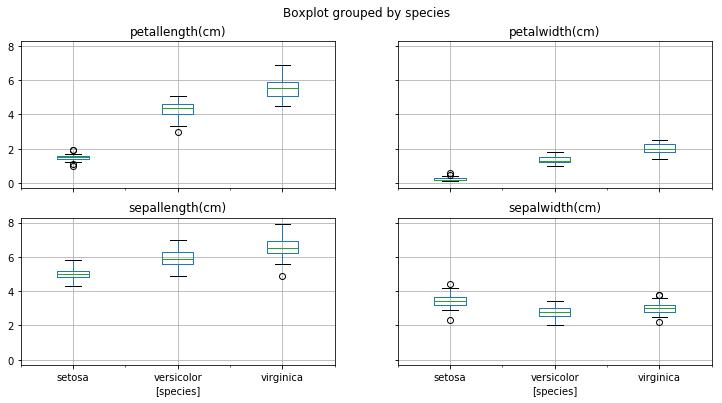

In [7]:
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="species", figsize=(12, 6))

In [8]:
# print the mean for each column by species
iris.groupby(by = "species").mean()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


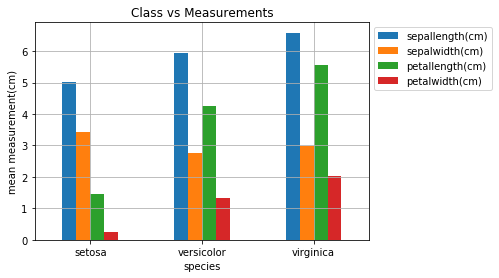

In [9]:
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")

plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy 
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Correlation matrix
Correlation function uses Pearson correlation coefficient which results in a number between -1 to 1. Strong negative relationship is indicated by a coefficient is toward -1 and a strong positive correlation is indicated by a coefficient towards 1.

In [10]:
# create correlation matrix
corr = iris.corr()
print(corr)

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


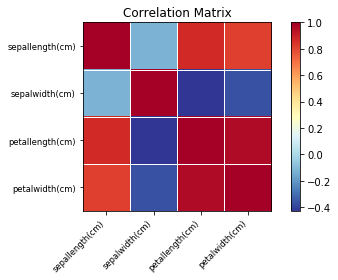

In [11]:
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Pair plot

You can understnad the relationship attributes by looking at the distribution of the interactions of each pair of attributes

This uses a built function to create a matrix of scatter plots of all attributes versus all attributes.

Text(0.5, 0.98, 'Pair Plot')

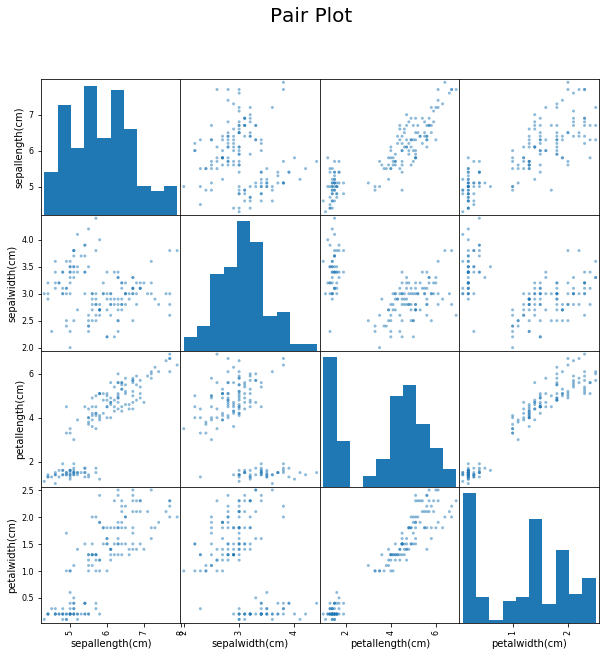

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
plt.suptitle("Pair Plot", fontsize=20) # use suptitle to add title to all sublots

### Findings of EDA

* There are no missing values
* Sepal is longer than petal. Sepal length ranges between 4.3 to 7.9 with average lenth of 5.8, whereas petal length ranges between 1 to 6.9 with average length of 3.7
* Sepal is also wider than petal. Sepal width ranges between 2 to 4.4 with a average width of 3.05, whereas petal width ranges between 0.1 to 2.5 with average width of 1.19

* Average petal length of setosa is much smaller than versicolor and virginica, however the average sepal width of setosa is higher than versicolor and virginica

* Petal length and width are strongly correlated i.e., 96% of the time width increases with increase in length

* Petal length has negative correlation with sepal widht i.e., 42% of the time increase in sepal width will decrease petal length 

#### initial conclusion from data:
Based on length and width of sepal/petal alone, you can conclude that versicolor/virginica might resemble in size, however setosa characteristics seems to be noticeably different from other two.

### Let's look at the actual flowers to see if the finding makes sense!

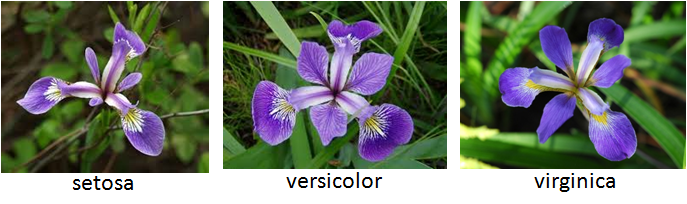

In [13]:
Image(filename='../Chapter 3 Figures/iris_photo.png', width=900)